## Import

In [1]:
!pip install -r requirements.txt --upgrade

  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)


In [2]:

# Datahandling

!pip install wordcloud

import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px





## Non labeled data

In [3]:
data = pd.read_csv('output/novonordisk.csv')

In [4]:
data.head()

,Tweet_id,User_name,Screen_name,Tweet_text,Language,Hashtags,Created_at,Search_keyword
0,1860719438225375240,Quality Stocks,Quality_stocksA,🇩🇰 Novo Nordisk $NVO one pager\n\n🏆 Score 7.9/...,en,[],2024-11-24 16:17:39+00:00,Novo Nordisk
1,1634584989638725632,The Investing for Beginners Podcast,IFB_podcast,1/37 Today's shallow dive focuses on $NVO Novo...,en,[],2023-03-11 16:00:05+00:00,Novo Nordisk
2,1862458532416590198,Oliver | MMMT Wealth (CPA),MMMTwealth,2. Novo Nordisk | $NOVO 🇩🇰\n\nRevenue growth: ...,en,[],2024-11-29 11:28:11+00:00,Novo Nordisk
3,1862578552488509669,Buck Parish,flatbush711,Just another Scam from the Dirty Communist Bas...,en,[],2024-11-29 19:25:06+00:00,Novo Nordisk
4,1854236893749325830,Trung Phan,TrungTPhan,when you realize Ozempic maker Novo Nordisk ($...,en,[],2024-11-06 18:58:20+00:00,Novo Nordisk


DataFrame Overview:
--------------------------------------------------

1. DataFrame Shape:
Total Rows: 238
Total Columns: 8

2. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet_id        238 non-null    int64 
 1   User_name       238 non-null    object
 2   Screen_name     238 non-null    object
 3   Tweet_text      238 non-null    object
 4   Language        238 non-null    object
 5   Hashtags        238 non-null    object
 6   Created_at      238 non-null    object
 7   Search_keyword  238 non-null    object
dtypes: int64(1), object(7)
memory usage: 15.0+ KB
None

3. Missing Values:
Tweet_id          0
User_name         0
Screen_name       0
Tweet_text        0
Language          0
Hashtags          0
Created_at        0
Search_keyword    0
dtype: int64

4. Basic Statistics for Numeric Columns:
           Tweet


Hashtag Analysis:
--------------------------------------------------

Hashtag Statistics:
count    238.000000
mean       0.231092
std        0.932964
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Hashtag_Count, dtype: float64


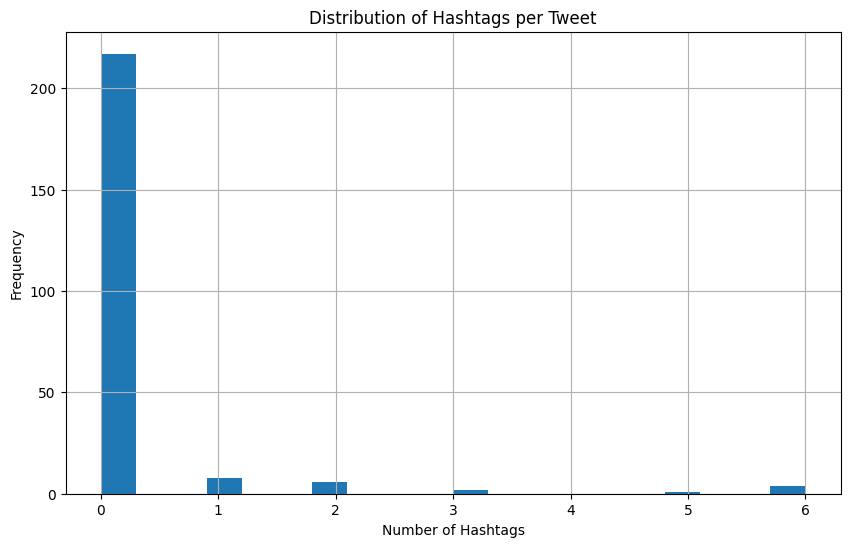


Keyword Analysis:
--------------------------------------------------

Search Keywords:
Search_keyword
Novo Nordisk    140
Ozempic          98
Name: count, dtype: int64



Text Analysis:
--------------------------------------------------

Tweet Length Statistics:
count    238.000000
mean     176.331933
std       90.486607
min       40.000000
25%       97.250000
50%      161.500000
75%      273.250000
max      318.000000
Name: Tweet_Length, dtype: float64


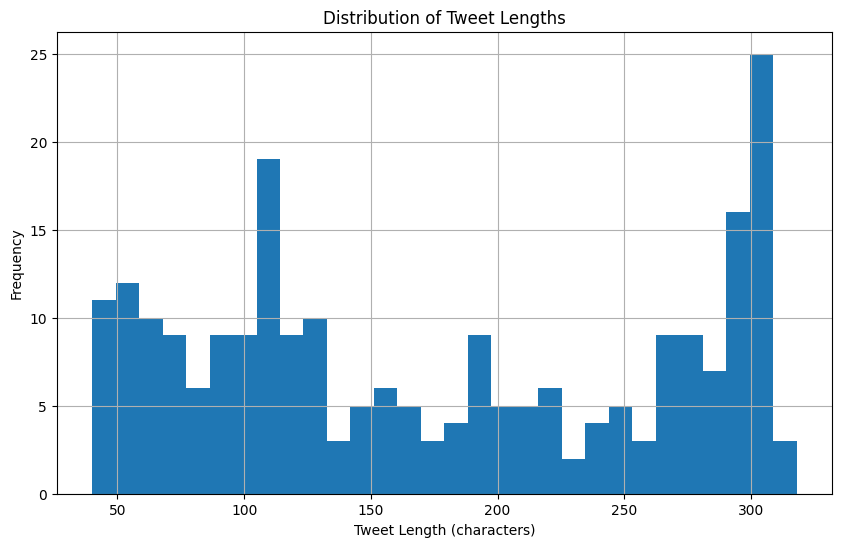


Word Count Statistics:
count    238.000000
mean      26.348739
std       15.077585
min        3.000000
25%       13.000000
50%       24.000000
75%       41.000000
max       56.000000
Name: Word_Count, dtype: float64


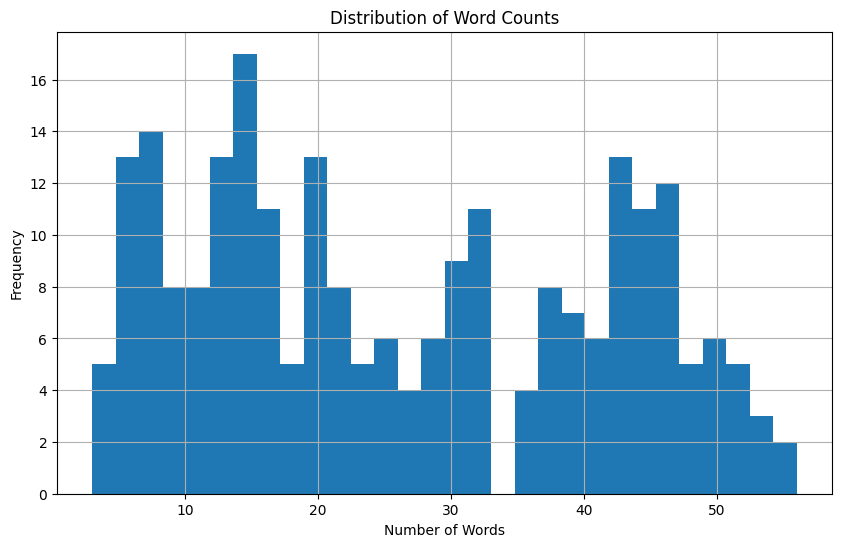


Word Frequency Analysis:
--------------------------------------------------


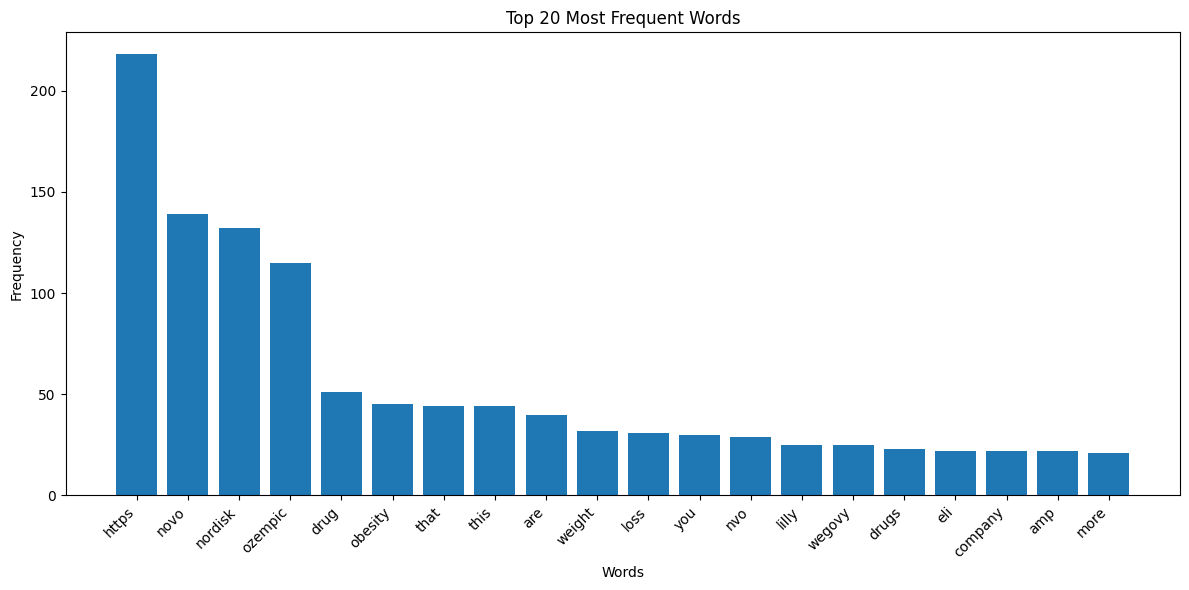


Top 20 Most Frequent Words:
https: 218
novo: 139
nordisk: 132
ozempic: 115
drug: 51
obesity: 45
that: 44
this: 44
are: 40
weight: 32
loss: 31
you: 30
nvo: 29
lilly: 25
wegovy: 25
drugs: 23
eli: 22
company: 22
amp: 22
more: 21


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


# Basic Overview
def basic_eda(data):
    print("DataFrame Overview:")
    print("-" * 50)
    
    # Basic Information
    print("\n1. DataFrame Shape:")
    print(f"Total Rows: {data.shape[0]}")
    print(f"Total Columns: {data.shape[1]}")
    
    print("\n2. Column Information:")
    print(data.info())
    
    print("\n3. Missing Values:")
    print(data.isnull().sum())
    
    print("\n4. Basic Statistics for Numeric Columns:")
    print(data.describe())


# User Analysis
def user_analysis(data):
    print("\nUser Analysis:")
    print("-" * 50)
    
    # Top Users
    top_users = data['User_name'].value_counts().head(10)
    print("\nTop 10 Users:")
    print(top_users)
    
    # Plotly Bar Chart for Top Users
    fig = px.bar(
        x=top_users.index, 
        y=top_users.values, 
        title='Top 10 Users by Tweet Count',
        labels={'x': 'User', 'y': 'Number of Tweets'}
    )
    fig.show()


# Hashtag Analysis
def hashtag_analysis(data):
    # Extract and flatten hashtags
    data['Hashtag_Count'] = data['Hashtags'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)
    
    print("\nHashtag Analysis:")
    print("-" * 50)
    
    print("\nHashtag Statistics:")
    print(data['Hashtag_Count'].describe())
    
    # Histogram of Hashtag Counts
    plt.figure(figsize=(10, 6))
    data['Hashtag_Count'].hist(bins=20)
    plt.title('Distribution of Hashtags per Tweet')
    plt.xlabel('Number of Hashtags')
    plt.ylabel('Frequency')
    plt.show()


# Keyword Analysis
def keyword_analysis(data):
    print("\nKeyword Analysis:")
    print("-" * 50)
    
    keyword_counts = data['Search_keyword'].value_counts()
    print("\nSearch Keywords:")
    print(keyword_counts)
    
    # Pie Chart of Keywords
    fig = px.pie(
        names=keyword_counts.index, 
        values=keyword_counts.values, 
        title='Search Keywords Distribution'
    )
    fig.show()


# Text Analysis
def text_analysis(data):
    print("\nText Analysis:")
    print("-" * 50)
    
    # Tweet Length Analysis
    data['Tweet_Length'] = data['Tweet_text'].str.len()
    
    print("\nTweet Length Statistics:")
    print(data['Tweet_Length'].describe())
    
    # Histogram of Tweet Lengths
    plt.figure(figsize=(10, 6))
    data['Tweet_Length'].hist(bins=30)
    plt.title('Distribution of Tweet Lengths')
    plt.xlabel('Tweet Length (characters)')
    plt.ylabel('Frequency')
    plt.show()
    
    # Word Count Analysis
    data['Word_Count'] = data['Tweet_text'].str.split().str.len()
    
    print("\nWord Count Statistics:")
    print(data['Word_Count'].describe())
    
    # Histogram of Word Counts
    plt.figure(figsize=(10, 6))
    data['Word_Count'].hist(bins=30)
    plt.title('Distribution of Word Counts')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()


# Word Frequency Analysis
def word_frequency_analysis(data):
    print("\nWord Frequency Analysis:")
    print("-" * 50)
    
    # Combine all tweets
    all_tweets = ' '.join(data['Tweet_text'])
    
    # Basic word frequency
    from collections import Counter
    import re
    
    # Clean and tokenize
    words = re.findall(r'\w+', all_tweets.lower())
    
    # Remove very common words
    stop_words = set(['the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by'])
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Count and display top words
    word_freq = Counter(words).most_common(20)
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    words, counts = zip(*word_freq)
    plt.bar(words, counts)
    plt.title('Top 20 Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print word frequencies
    print("\nTop 20 Most Frequent Words:")
    for word, count in word_freq:
        print(f"{word}: {count}")


# Main Execution
def main_eda(data):
    basic_eda(data)
    user_analysis(data)
    hashtag_analysis(data)
    keyword_analysis(data)
    text_analysis(data)
    word_frequency_analysis(data)


# Run the EDA
main_eda(data)

## Labeled data

In [6]:
data_labeled = pd.read_csv('predictions_output.csv')

In [7]:
data_labeled.head()

,Tweet_id,User_name,Screen_name,Tweet_text,Language,Hashtags,Created_at,Search_keyword,Label
0,1860719438225375240,Quality Stocks,Quality_stocksA,novo nordisk nvo one pager\n\n score 7910\n m...,en,[],2024-11-24 16:17:39+00:00,Novo Nordisk,0
1,1634584989638725632,The Investing for Beginners Podcast,IFB_podcast,137 todays shallow dive focuses on nvo novo no...,en,[],2023-03-11 16:00:05+00:00,Novo Nordisk,1
2,1862458532416590198,Oliver | MMMT Wealth (CPA),MMMTwealth,2 novo nordisk novo \n\nrevenue growth 26\nev...,en,[],2024-11-29 11:28:11+00:00,Novo Nordisk,1
3,1862578552488509669,Buck Parish,flatbush711,just another scam from the dirty communist bas...,en,[],2024-11-29 19:25:06+00:00,Novo Nordisk,1
4,1854236893749325830,Trung Phan,TrungTPhan,when you realize ozempic maker novo nordisk 47...,en,[],2024-11-06 18:58:20+00:00,Novo Nordisk,0


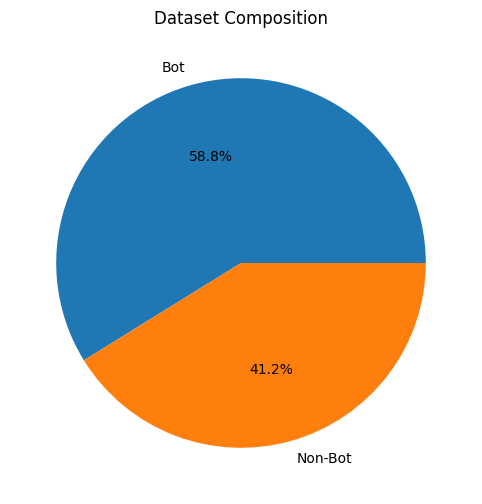


Dataset Composition:
Label
0    0.588235
1    0.411765
Name: proportion, dtype: float64


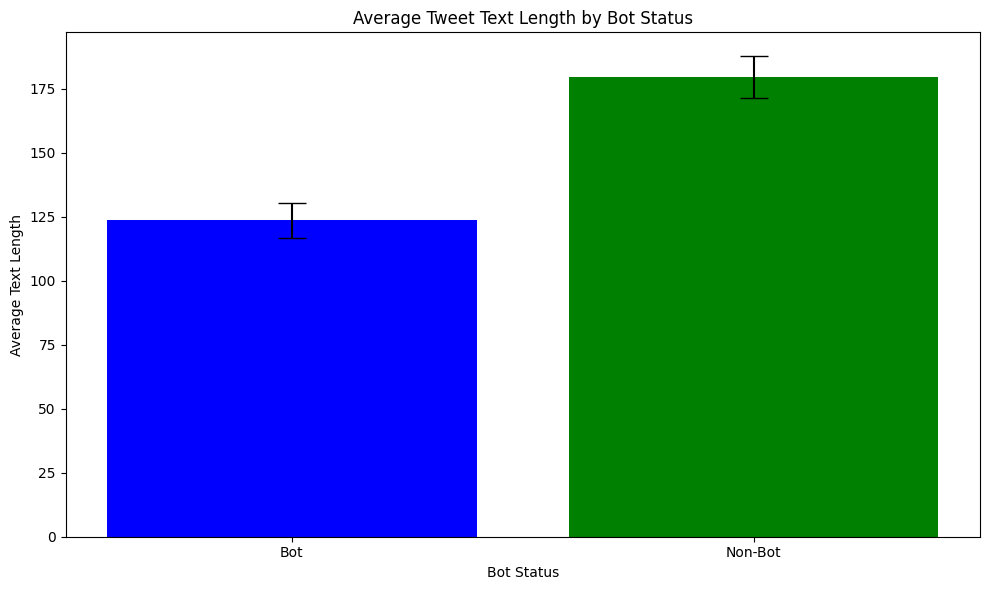


Text Length Statistics:
       count        mean        std   min    25%    50%     75%    max
Label                                                                 
0      140.0  123.485714  80.717242  16.0   59.0   99.5  188.00  280.0
1       98.0  179.357143  81.210081  25.0  103.5  192.0  258.75  277.0


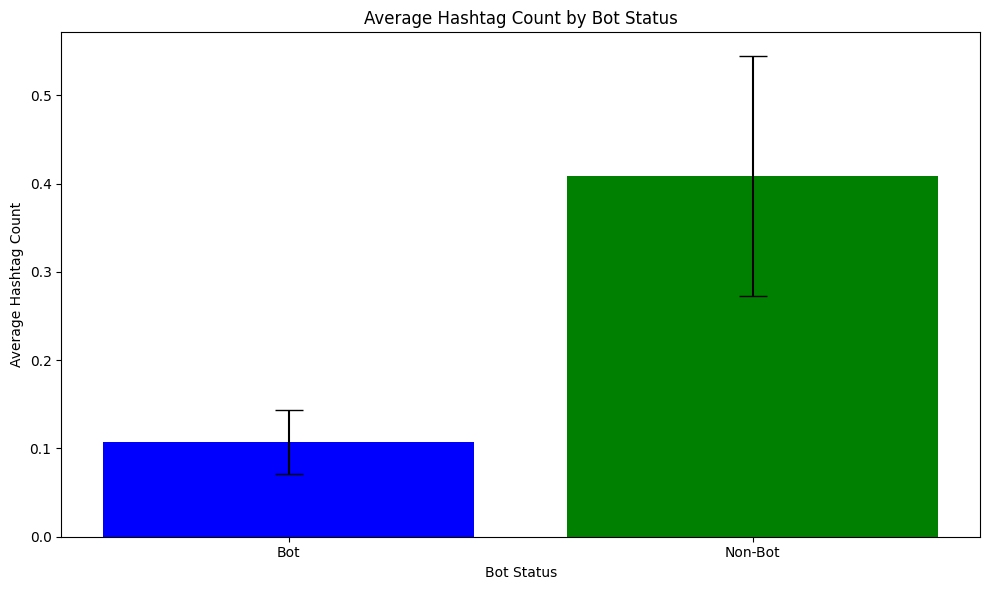


Hashtag Count Statistics:
       count      mean       std  min  25%  50%  75%  max
Label                                                    
0      140.0  0.107143  0.427414  0.0  0.0  0.0  0.0  3.0
1       98.0  0.408163  1.345759  0.0  0.0  0.0  0.0  6.0


<Figure size 1200x600 with 0 Axes>

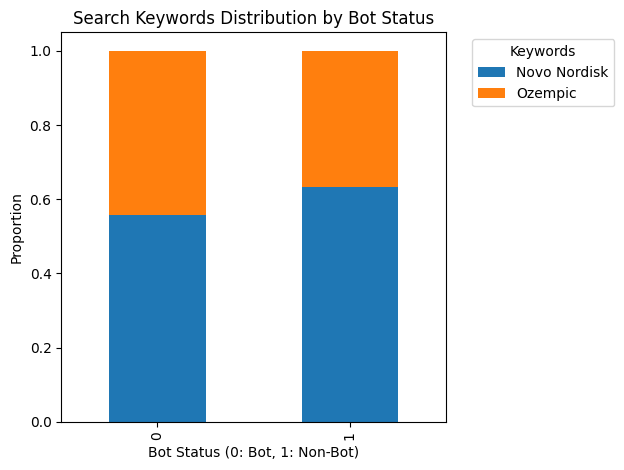


Top Keywords:
Search_keyword
Novo Nordisk    0.588235
Ozempic         0.411765
Name: proportion, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def detect_label_column(data):
    possible_columns = ['label', 'Label', 'Predicted_Label', 'bot_label']
    for col in possible_columns:
        if col in data.columns:
            return col
    raise ValueError("No label column found in the dataset")


def bot_eda(data):
    # Dynamically detect the label column
    label_column = detect_label_column(data)
    
    # 1. Dataset Composition
    def dataset_composition():
        plt.figure(figsize=(8, 6))
        label_counts = data[label_column].value_counts()
        plt.pie(label_counts, labels=['Bot', 'Non-Bot'], autopct='%1.1f%%')
        plt.title('Dataset Composition')
        plt.show()
        
        print("\nDataset Composition:")
        print(data[label_column].value_counts(normalize=True))
    
    # 2. Text Analysis
    def text_analysis():
        # Calculate text lengths
        data['Text_Length'] = data['Tweet_text'].str.len()
        
        plt.figure(figsize=(10, 6))
        # Group by label and calculate mean and standard error
        text_length_summary = data.groupby(label_column)['Text_Length'].agg(['mean', 'sem'])
        
        plt.bar(text_length_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
                text_length_summary['mean'], 
                yerr=text_length_summary['sem'], 
                capsize=10,
                color=['blue', 'green'])
        
        plt.title('Average Tweet Text Length by Bot Status')
        plt.xlabel('Bot Status')
        plt.ylabel('Average Text Length')
        plt.tight_layout()
        plt.show()
        
        # Descriptive statistics of text length
        print("\nText Length Statistics:")
        print(data.groupby(label_column)['Text_Length'].describe())
    
    # 3. Hashtag Analysis
    def hashtag_analysis():
        # Ensure Hashtags is a list
        def safe_hashtag_count(x):
            try:
                return len(eval(x)) if isinstance(x, str) else 0
            except:
                return 0
        
        data['Hashtag_Count'] = data['Hashtags'].apply(safe_hashtag_count)
        
        plt.figure(figsize=(10, 6))
        # Group by label and calculate mean and standard error
        hashtag_summary = data.groupby(label_column)['Hashtag_Count'].agg(['mean', 'sem'])
        
        plt.bar(hashtag_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
                hashtag_summary['mean'], 
                yerr=hashtag_summary['sem'], 
                capsize=10,
                color=['blue', 'green'])
        
        plt.title('Average Hashtag Count by Bot Status')
        plt.xlabel('Bot Status')
        plt.ylabel('Average Hashtag Count')
        plt.tight_layout()
        plt.show()
        
        # Descriptive statistics of hashtag count
        print("\nHashtag Count Statistics:")
        print(data.groupby(label_column)['Hashtag_Count'].describe())
    
    # 4. Keyword Analysis
    def keyword_analysis():
        plt.figure(figsize=(12, 6))
        keyword_counts = data.groupby([label_column, 'Search_keyword']).size().unstack(fill_value=0)
        keyword_counts_normalized = keyword_counts.div(keyword_counts.sum(axis=1), axis=0)
        
        keyword_counts_normalized.plot(kind='bar', stacked=True)
        plt.title('Search Keywords Distribution by Bot Status')
        plt.xlabel('Bot Status (0: Bot, 1: Non-Bot)')
        plt.ylabel('Proportion')
        plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        print("\nTop Keywords:")
        print(data['Search_keyword'].value_counts(normalize=True).head())
    
    # Run all analyses
    dataset_composition()
    text_analysis()
    hashtag_analysis()
    keyword_analysis()


# Execute EDA
bot_eda(data_labeled)